# MNIST
This notebook shows sample-based explanations for individual test predictions for a tree ensemble trained on two or more classes in the MNIST dataset. We show the raw images for the test instance, and the raw images for the most impactful train instances; positive (top row) and negative (bottom row).

In [1]:
import os
import sys
sys.path.insert(0, os.getcwd() + '/../')  # for scripts
sys.path.insert(0, os.getcwd() + '/../../')  # for TREX

from scripts.mnist import prediction_explanation
data_dir = '../../data'

### 2s and 7s
We start by training a model on 2s and 7s, then randomly picking a test image to explain.

train instances: 12223
test instances: 2060
labels: [2, 7]
reducing dimensionality from 784 to 50 using PCA...
fitting lgb model...
fitting tree explainer...

Tree Explainer:
train shape: (12223, 50)
classes: [2 7]
linear_model: SVM(C=0.1, coef0=0.0, degree=3, gamma='scale', kernel='linear', pred_size=500,
    random_state=1)
encoding: leaf_path
dense_output: True
fit predicted labels: False
random state: 1

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.00113
train auroc: 1.000
test set acc: 0.982039
test log loss: 0.06450
test auroc: 0.998


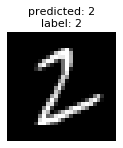

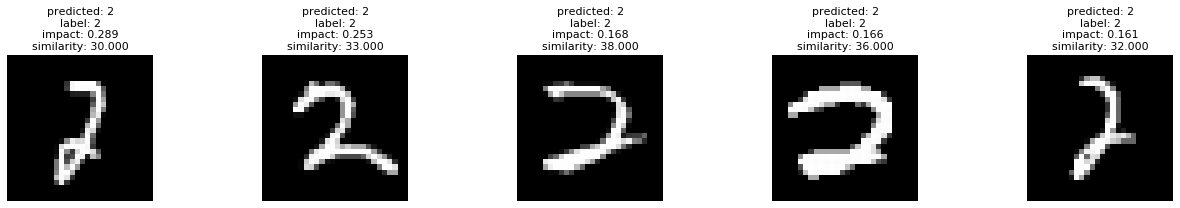

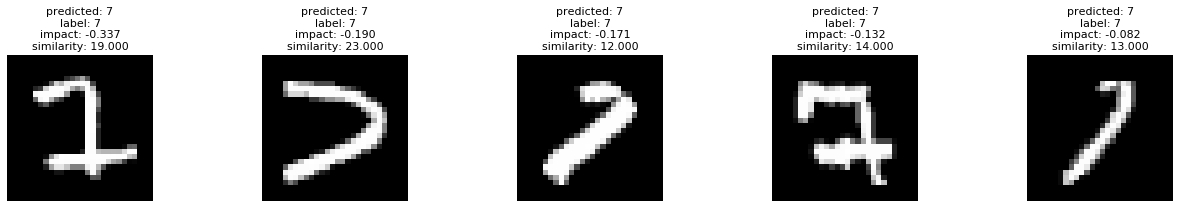

In [3]:
prediction_explanation(model='lgb', encoding='leaf_path', dataset='mnist_27', linear_model='svm',
                       kernel='linear', true_label=True, random_state=1, topk_train=5, data_dir=data_dir)

By using the `leaf_path` encoding, we see the excitatory training instances (top) are 2's that look like the test instance, while the inhibitory examples (bottom) are 7s that also partially look like the test instance.

train instances: 12223
test instances: 2060
labels: [2, 7]
reducing dimensionality from 784 to 50 using PCA...
fitting lgb model...
fitting tree explainer...

Tree Explainer:
train shape: (12223, 50)
classes: [2 7]
linear_model: SVM(C=0.1, coef0=0.0, degree=3, gamma='scale', kernel='linear', pred_size=500,
    random_state=1)
encoding: leaf_output
dense_output: True
fit predicted labels: False
random state: 1

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.00113
train auroc: 1.000
test set acc: 0.982039
test log loss: 0.06450
test auroc: 0.998


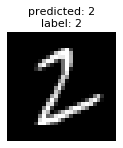

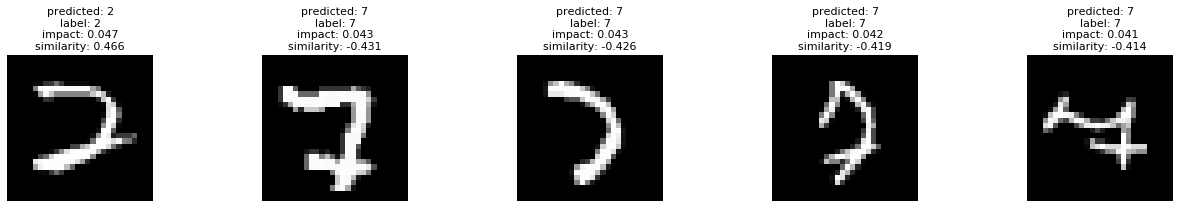

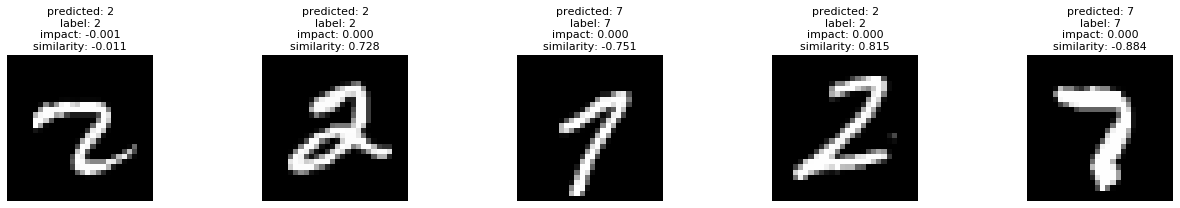

In [4]:
prediction_explanation(model='lgb', encoding='leaf_output', dataset='mnist_27', linear_model='svm',
                       kernel='linear', true_label=True, random_state=1, topk_train=5, data_dir=data_dir)

If we replace the `leaf_path` encoding with `leaf_output`, and still use a linear kernel, we can get similar and dissimilar training instances to the test instance. Thus, our explanation may now contain excitatory training instances of the opposite class. For example, the second training instance in the top row is a 7, but it contributes towards the label 2 being predicted as it is dissimilar from the test instance.

train instances: 12223
test instances: 2060
labels: [2, 7]
reducing dimensionality from 784 to 50 using PCA...
fitting lgb model...
fitting tree explainer...

Tree Explainer:
train shape: (12223, 50)
classes: [2 7]
linear_model: SVM(C=0.1, coef0=0.0, degree=3, gamma='scale', kernel='rbf', pred_size=500,
    random_state=1)
encoding: leaf_output
dense_output: True
fit predicted labels: False
random state: 1

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.00113
train auroc: 1.000
test set acc: 0.982039
test log loss: 0.06450
test auroc: 0.998


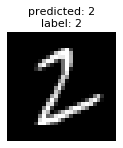

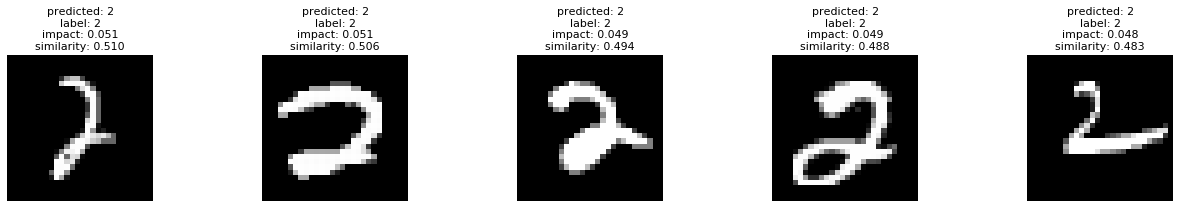

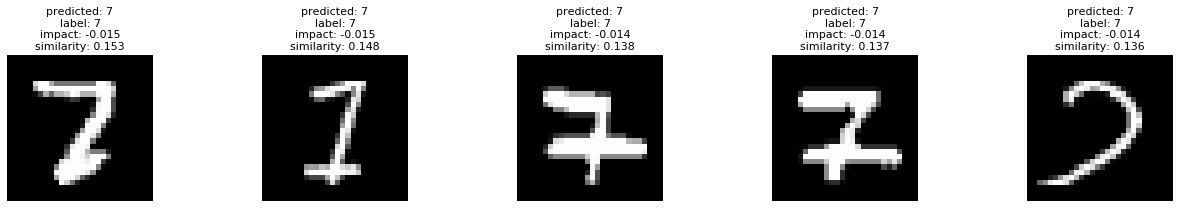

In [5]:
prediction_explanation(model='lgb', encoding='leaf_output', dataset='mnist_27', linear_model='svm',
                       kernel='rbf', true_label=True, random_state=1, topk_train=5, data_dir=data_dir)

Finally, we see how our explanation may change if we use an `rbf` kernel with a `leaf_output` encoding.

### 4s and 9s
Next, we take a look at 4s and 9s, as they can sometimes be drawn in similar ways.

train instances: 11791
test instances: 1991
labels: [4, 9]
reducing dimensionality from 784 to 50 using PCA...
fitting lgb model...
fitting tree explainer...

Tree Explainer:
train shape: (11791, 50)
classes: [4 9]
linear_model: SVM(C=0.1, coef0=0.0, degree=3, gamma='scale', kernel='rbf', pred_size=500,
    random_state=8)
encoding: leaf_output
dense_output: True
fit predicted labels: False
random state: 8

model (LGBMClassifier)
train set acc: 0.999661
train log loss: 0.02076
train auroc: 1.000
test set acc: 0.975892
test log loss: 0.06847
test auroc: 0.998


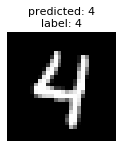

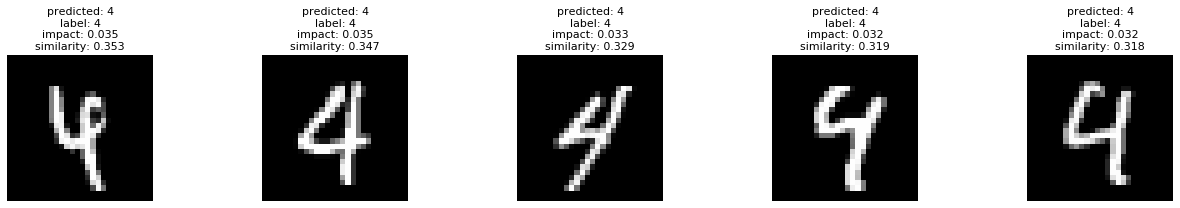

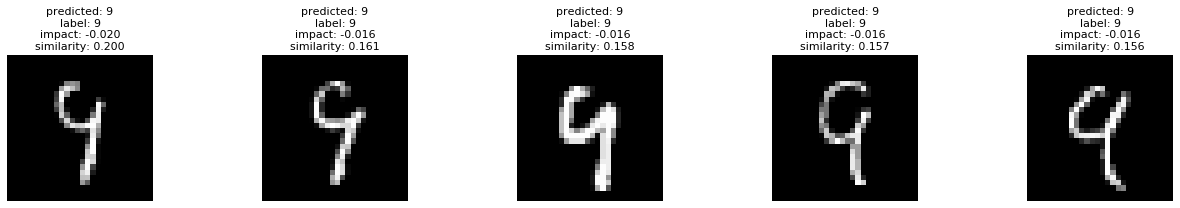

In [15]:
prediction_explanation(model='lgb', encoding='leaf_output', dataset='mnist_49', linear_model='svm',
                       kernel='rbf', true_label=True, random_state=8, topk_train=5, data_dir=data_dir)

We can see from this explanation that the inhibitory training examples (bottom) are 9s that may be interpreted as 4s.

### 6s and 9s
We also look at 6s and 9s as they can sometimes be misconstrued.

train instances: 11867
test instances: 1967
labels: [6, 9]
reducing dimensionality from 784 to 50 using PCA...
fitting lgb model...
fitting tree explainer...

Tree Explainer:
train shape: (11867, 50)
classes: [6 9]
linear_model: SVM(C=0.1, coef0=0.0, degree=3, gamma='scale', kernel='rbf', pred_size=500,
    random_state=1)
encoding: leaf_output
dense_output: True
fit predicted labels: False
random state: 1

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.00006
train auroc: 1.000
test set acc: 0.993899
test log loss: 0.02043
test auroc: 1.000


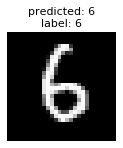

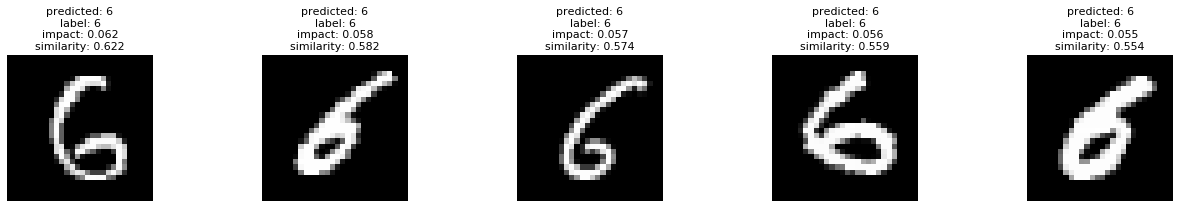

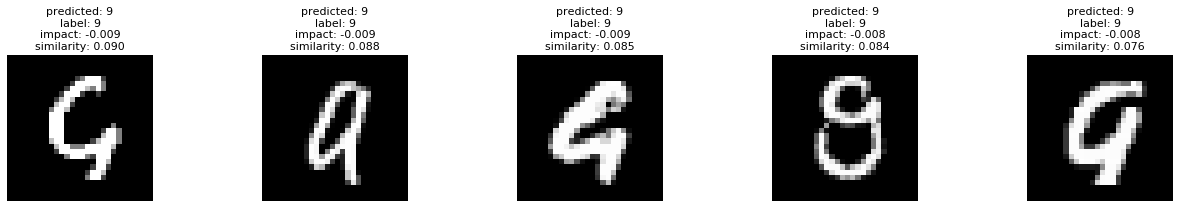

In [17]:
prediction_explanation(model='lgb', encoding='leaf_output', dataset='mnist_69', linear_model='svm',
                       kernel='rbf', true_label=True, random_state=1, topk_train=5, data_dir=data_dir)

Again, we see some of the detrimental traning samples (bottom) looking like 6s in some cases.